# On-policy Prediction with Approximation

## Moving to Parameterized Functions

### Parameterizing the Value Function

- approximate $v_\pi(s)$ as $\hat{v}(s,\mathbf{w})$

$$
\hat{v}(s,\underbrace{\mathbf{w}}_{\text{weights}}) \approx v_\pi(s)
$$

- Example of Parameterized Value Function

$$
\hat{v}(s,\mathbf{w}) \doteq \underbrace{w_1 X + w_2 Y}_{\text{We only have to store the two weights}}
$$

### Linear Value Function Approximation

$$
\begin{align*}
\hat{v}(s,\mathbf{w}) &\doteq \sum{\underbrace{w_i x_i(s)}_{\text{features}}}\\
                      &=<\mathbf{w},\mathbf{x}(s)>
\end{align*}
$$

## Generalization and Discrimination

- Tabular representations have provided good *discrimination*, but no *generalization*
- Generalization is important for faster learning
- Having both generalization and discrimination is ideal




## Framing Value Estimation as Suprevised Learning

- Monte-Carlo

$$
\{(S_1,G_1),(S_2,G_2),(S_3,G_3),\ldots\}
$$

- TD

$$
\{(S_1,R_2+\gamma\hat{v}(S_2,\mathbf{w})),(S_2,R_3+\gamma\hat{v}(S_3,\mathbf{w})),(S_3,R_4+\gamma\hat{v}(S_4,\mathbf{w})),\ldots\}
$$

## The Function Approximator should be Compatible with Online Updates


- We can frame the policy evaluation task as a *suprevised learning* problem
- But not all methods from supervised learning are ideal for reinforcement learning
  - If we want to use a function approximation technique, we should make sure it can work in the online setting
  - The data in reinforcement learning is always correlated

## The Function Approximator should be Compatible with Bootstrapping

- TD: Target depends on $\mathbf{w}$
- Supervised Learning: Target is fixed and given

## The Mean Squared Value Error Objective

- Mean Squared Value Error

$$
\sum_{s}{\mu(s)[v_\pi(s)-\hat{v}(s,\mathbf{w})]^2}
$$

- How to choose $\mu(s)$?
  - The fraction of time we spend in $S$ when following policy $\pi$

## Adapting the Weights to Minimize the Mean Squared Value Error Objective

$$
\overline{VE}=\sum_{s}{\mu(s)[v_\pi(s)-\hat{v}(s,\mathbf{w})]^2}
$$


## Introducing Gradient Descent

- Gradient Descent

$$
\mathbf{w}_{t+1} \doteq \mathbf{w}_t - \alpha \nabla J(\mathbf{w}_t)
$$

- Gradient Descent can be used to find stationary points of objectives
- These solutions are not always globally optimal


## Gradient of the Mean Squared Value Error Objective

$$
\begin{align*}
&\nabla \sum_{s\in\mathcal{S}}{\mu(s)[v_\pi(s)-\hat{v}(s,\mathbf{w})]^2}\\
&= \sum_{s\in\mathcal{S}}{\nabla\mu(s)[v_\pi(s)-\hat{v}(s,\mathbf{w})]^2}\\
&= -\sum_{s\in\mathcal{S}}{\mu(s)2[v_\pi(s)-\hat{v}(s,\mathbf{w})]} \nabla \hat{v}(s,\mathbf{w})& \text{(chain rule)}
\end{align*}
$$

so

$$
\begin{align*}
&\Delta \mathbf{w} \propto \sum_{s\in\mathcal{S}}{\nabla\mu(s)[v_\pi(s)-\hat{v}(s,\mathbf{w})]}& (\because\Delta\hat{v}(s,\mathbf{w})=\mathbf{x}(s))
\end{align*}
$$

## Gradient Descent for Policy Evaluation

### From Gradient Descent to Stochastic Gradient Descent

- Gradient Monte Carlo

$$
\begin{gather*}
\mathbf{w_{t+1}}\doteq\mathbf{w_t}+\alpha[\underbrace{v_\pi(S_t)}_{\text{?}}-\hat{v}(S_t,\mathbf{w})\nabla\hat{v}(S_t,\mathbf{w})]\\
\mathbf{w_{t+1}}\doteq\mathbf{w_t}+\alpha[G_t-\hat{v}(S_t,\mathbf{w})\nabla\hat{v}(S_t,\mathbf{w})]
\end{gather*}
$$

so

$$
\begin{align*}
&\mathbb{E}_\pi[2[v_\pi(S_t)-\hat{v}(S_t,\mathbf{w})]\nabla\hat{v}(S_t,\mathbf{w})]\\
=&\mathbb{E}_\pi[2[G_t-\hat{v}(S_t,\mathbf{w})]\nabla\hat{v}(S_t,\mathbf{w})]
\end{align*}
$$

## State Aggregation

- State aggregation treats certain states as the same
- State aggregation is another example of linear function approximation


## Semi-Gradient TD for Policy Evaluation

### The TD Update for Function Approximation

$$
\begin{gather*}
\mathbf{w} \leftarrow \mathbf{w} + \alpha [U_t - \hat{v}(S_t, \mathbf{w})]\nabla \hat{v}(S_t, \mathbf{w})\\
U_t \doteq R_{t+1} + \gamma \hat{v}(S_{t+1}, \mathbf{w})
\end{gather*}
$$

- $U_t$: biased $\rightarrow$ $\mathbf{w}$ may not converge to a local optimum

### TD is a semi-gradient method

$$
\begin{align*}
\nabla \frac{1}{2} [U_t - \hat{v}(S_t, \mathbf{w})]^2 &= (U_t - \hat{v}(S_t, \mathbf{w})) (\nabla U_t - \nabla\hat{v}(S_t, \mathbf{w})) \\
                                                      &\neq \underbrace{- (U_t - \hat{v}(S_t, \mathbf{w}))\nabla\hat{v}(S_t, \mathbf{w})}_{\text{The TD Update}}
\end{align*}
$$

For TD:

$$
\begin{align*}
\nabla U_t &= \nabla (R_{t+1} + \gamma \hat{v}(S_{t+1}, \mathbf{w}))\\
           &= \gamma \nabla\hat{v}(S_t, \mathbf{w})\\
           &\neq 0
\end{align*}
$$

## Example: State Aggregation on the 1000-state Random Walk

In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################


import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm
from ipywidgets import IntProgress

# # of states except for terminal states
N_STATES = 1000

# all states
STATES = np.arange(1, N_STATES + 1)

# start from a central state
START_STATE = 500

# terminal states
END_STATES = [0, N_STATES + 1]

# possible actions
ACTION_LEFT = -1
ACTION_RIGHT = 1
ACTIONS = [ACTION_LEFT, ACTION_RIGHT]

# maximum stride for an action
STEP_RANGE = 100

def compute_true_value():
    # true state value, just a promising guess
    true_value = np.arange(-1001, 1003, 2) / 1001.0

    # Dynamic programming to find the true state values, based on the promising guess above
    # Assume all rewards are 0, given that we have already given value -1 and 1 to terminal states
    while True:
        old_value = np.copy(true_value)
        for state in STATES:
            true_value[state] = 0
            for action in ACTIONS:
                for step in range(1, STEP_RANGE + 1):
                    step *= action
                    next_state = state + step
                    next_state = max(min(next_state, N_STATES + 1), 0)
                    # asynchronous update for faster convergence
                    true_value[state] += 1.0 / (2 * STEP_RANGE) * true_value[next_state]
        error = np.sum(np.abs(old_value - true_value))
        if error < 1e-2:
            break
    # correct the state value for terminal states to 0
    true_value[0] = true_value[-1] = 0

    return true_value

# take an @action at @state, return new state and reward for this transition
def step(state, action):
    step = np.random.randint(1, STEP_RANGE + 1)
    step *= action
    state += step
    state = max(min(state, N_STATES + 1), 0)
    if state == 0:
        reward = -1
    elif state == N_STATES + 1:
        reward = 1
    else:
        reward = 0
    return state, reward

# get an action, following random policy
def get_action():
    if np.random.binomial(1, 0.5) == 1:
        return 1
    return -1

# a wrapper class for aggregation value function
class ValueFunction:
    # @num_of_groups: # of aggregations
    def __init__(self, num_of_groups):
        self.num_of_groups = num_of_groups
        self.group_size = N_STATES // num_of_groups

        # thetas
        self.params = np.zeros(num_of_groups)

    # get the value of @state
    def value(self, state):
        if state in END_STATES:
            return 0
        group_index = (state - 1) // self.group_size
        return self.params[group_index]

    # update parameters
    # @delta: step size * (target - old estimation)
    # @state: state of current sample
    def update(self, delta, state):
        group_index = (state - 1) // self.group_size
        self.params[group_index] += delta

# a wrapper class for tile coding value function
class TilingsValueFunction:
    # @num_of_tilings: # of tilings
    # @tileWidth: each tiling has several tiles, this parameter specifies the width of each tile
    # @tilingOffset: specifies how tilings are put together
    def __init__(self, numOfTilings, tileWidth, tilingOffset):
        self.numOfTilings = numOfTilings
        self.tileWidth = tileWidth
        self.tilingOffset = tilingOffset

        # To make sure that each sate is covered by same number of tiles,
        # we need one more tile for each tiling
        self.tilingSize = N_STATES // tileWidth + 1

        # weight for each tile
        self.params = np.zeros((self.numOfTilings, self.tilingSize))

        # For performance, only track the starting position for each tiling
        # As we have one more tile for each tiling, the starting position will be negative
        self.tilings = np.arange(-tileWidth + 1, 0, tilingOffset)

    # get the value of @state
    def value(self, state):
        stateValue = 0.0
        # go through all the tilings
        for tilingIndex in range(0, len(self.tilings)):
            # find the active tile in current tiling
            tileIndex = (state - self.tilings[tilingIndex]) // self.tileWidth
            stateValue += self.params[tilingIndex, tileIndex]
        return stateValue

    # update parameters
    # @delta: step size * (target - old estimation)
    # @state: state of current sample
    def update(self, delta, state):

        # each state is covered by same number of tilings
        # so the delta should be divided equally into each tiling (tile)
        delta /= self.numOfTilings

        # go through all the tilings
        for tilingIndex in range(0, len(self.tilings)):
            # find the active tile in current tiling
            tileIndex = (state - self.tilings[tilingIndex]) // self.tileWidth
            self.params[tilingIndex, tileIndex] += delta

# a wrapper class for polynomial / Fourier -based value function
POLYNOMIAL_BASES = 0
FOURIER_BASES = 1
class BasesValueFunction:
    # @order: # of bases, each function also has one more constant parameter (called bias in machine learning)
    # @type: polynomial bases or Fourier bases
    def __init__(self, order, type):
        self.order = order
        self.weights = np.zeros(order + 1)

        # set up bases function
        self.bases = []
        if type == POLYNOMIAL_BASES:
            for i in range(0, order + 1):
                self.bases.append(lambda s, i=i: pow(s, i))
        elif type == FOURIER_BASES:
            for i in range(0, order + 1):
                self.bases.append(lambda s, i=i: np.cos(i * np.pi * s))

    # get the value of @state
    def value(self, state):
        # map the state space into [0, 1]
        state /= float(N_STATES)
        # get the feature vector
        feature = np.asarray([func(state) for func in self.bases])
        return np.dot(self.weights, feature)

    def update(self, delta, state):
        # map the state space into [0, 1]
        state /= float(N_STATES)
        # get derivative value
        derivative_value = np.asarray([func(state) for func in self.bases])
        self.weights += delta * derivative_value

# gradient Monte Carlo algorithm
# @value_function: an instance of class ValueFunction
# @alpha: step size
# @distribution: array to store the distribution statistics
def gradient_monte_carlo(value_function, alpha, distribution=None):
    state = START_STATE
    trajectory = [state]

    # We assume gamma = 1, so return is just the same as the latest reward
    reward = 0.0
    while state not in END_STATES:
        action = get_action()
        next_state, reward = step(state, action)
        trajectory.append(next_state)
        state = next_state

    # Gradient update for each state in this trajectory
    for state in trajectory[:-1]:
        delta = alpha * (reward - value_function.value(state))
        value_function.update(delta, state)
        if distribution is not None:
            distribution[state] += 1

# semi-gradient n-step TD algorithm
# @valueFunction: an instance of class ValueFunction
# @n: # of steps
# @alpha: step size
def semi_gradient_temporal_difference(value_function, n, alpha):
    # initial starting state
    state = START_STATE

    # arrays to store states and rewards for an episode
    # space isn't a major consideration, so I didn't use the mod trick
    states = [state]
    rewards = [0]

    # track the time
    time = 0

    # the length of this episode
    T = float('inf')
    while True:
        # go to next time step
        time += 1

        if time < T:
            # choose an action randomly
            action = get_action()
            next_state, reward = step(state, action)

            # store new state and new reward
            states.append(next_state)
            rewards.append(reward)

            if next_state in END_STATES:
                T = time

        # get the time of the state to update
        update_time = time - n
        if update_time >= 0:
            returns = 0.0
            # calculate corresponding rewards
            for t in range(update_time + 1, min(T, update_time + n) + 1):
                returns += rewards[t]
            # add state value to the return
            if update_time + n <= T:
                returns += value_function.value(states[update_time + n])
            state_to_update = states[update_time]
            # update the value function
            if not state_to_update in END_STATES:
                delta = alpha * (returns - value_function.value(state_to_update))
                value_function.update(delta, state_to_update)
        if update_time == T - 1:
            break
        state = next_state

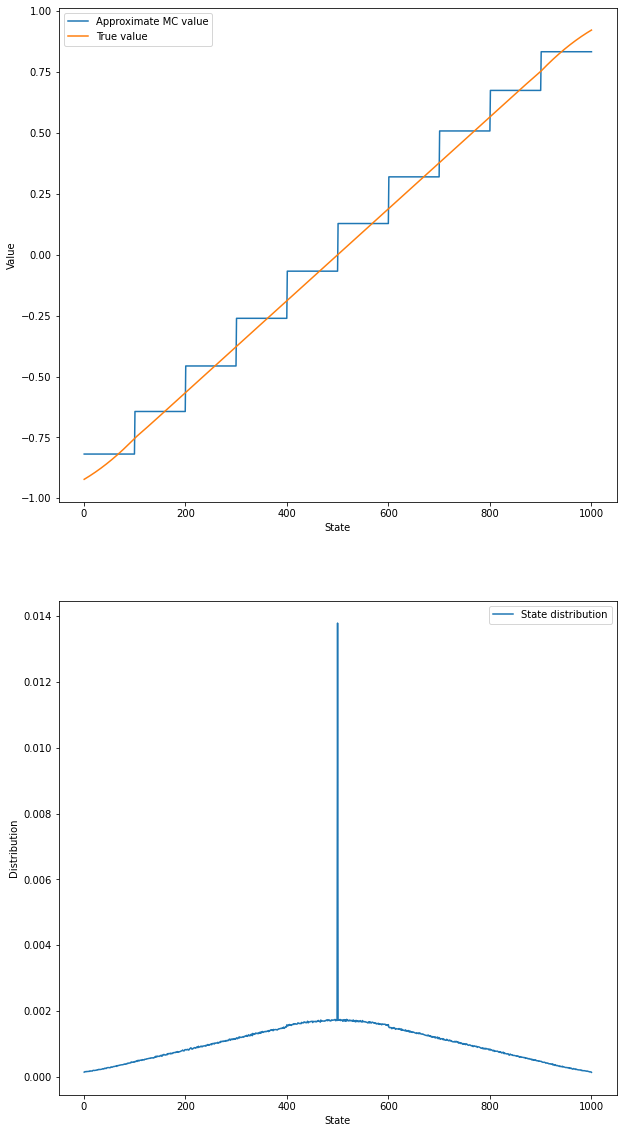

In [2]:
true_value = compute_true_value()
episodes = int(1e5)
alpha = 2e-5

# we have 10 aggregations in this example, each has 100 states
value_function = ValueFunction(10)
distribution = np.zeros(N_STATES + 2)
for ep in tqdm(range(episodes)):
    gradient_monte_carlo(value_function, alpha, distribution)

distribution /= np.sum(distribution)
state_values = [value_function.value(i) for i in STATES]

plt.figure(figsize=(10, 20))

plt.subplot(2, 1, 1)
plt.plot(STATES, state_values, label='Approximate MC value')
plt.plot(STATES, true_value[1: -1], label='True value')
plt.xlabel('State')
plt.ylabel('Value')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(STATES, distribution[1: -1], label='State distribution')
plt.xlabel('State')
plt.ylabel('Distribution')
plt.legend()

## Comparing TD and Monte Carlo with State Aggregation

- The TD update for function approximation can be *biased*
- We often prefer TD learning over Monte Carlo anyway because it can converge more quickly


## The Linear TD Update

- recall: semi gradient TD

$$
\begin{align*}
\mathbf{w} &\leftarrow \mathbf{w} + \alpha \delta_t \nabla \hat{v}(S_t, \mathbf{w})&  (\delta_t \doteq R_{t+1} + \gamma \hat{v}(S_{t+1}, \mathbf{w})-\hat{v}(S_{t}, \mathbf{w})) \\
\mathbf{w} &\leftarrow \mathbf{w} + \alpha \delta_t \mathbf{x}(S_t)
\end{align*}
$$

- Tabular TD is a special case of linear TD

### The Utility of Linear Function Approximation

- Linear methods are *simpler to understand and analyze* mathematically
- With *good features*, linear methods can learn quickly and achieve good prediction accuracy



## The True Objective for TD

### The Expected TD Update

$$
\begin{align*}
\mathbf{w}_{t+1} &\doteq \mathbf{w}_t + \alpha [R_{t+1} + \gamma \hat{v}(S_{t+1}, \mathbf{w}_t)-\hat{v}(S_t, \mathbf{w}_t)]\mathbf{x}_t & (\hat{v}(s, \mathbf{w})\doteq \mathbf{w}^T\mathbf{x}(s))\\
                 &= \mathbf{w}_t + \alpha [R_{t+1} + \gamma \mathbf{w}^T_{t}\mathbf{x}_{t+1}-\mathbf{w}^T_{t}\mathbf{x}_{t}]\mathbf{x}_t \\
                 &= \mathbf{w}_t + \alpha [\underbrace{R_{t+1}\mathbf{x}_t}_{\mathbf{b}} - \underbrace{\mathbf{x}_{t}(\mathbf{x}_{t}-\gamma \mathbf{x}_{t+1})^T}_{\mathbf{A}}\mathbf{w}_t]
\end{align*}
$$

so

$$
\begin{gather*}
&\mathbb{E}[\Delta\mathbf{w}_t] = \alpha(\mathbf{b}-\mathbf{A}\mathbf{w}_t)&(\mathbf{b}\doteq \mathbb{E}[R_{t+1}\mathbf{x}_t],\ \mathbf{A}\doteq\mathbb{E}[\mathbf{x}_t(\mathbf{x}_t-\gamma\mathbf{x}_{t+1})^T])
\end{gather*}
$$

### The TD Fixed Point

$$
\begin{gather*}
\mathbb{E}[\Delta \mathbf{w}_{TD}] = \alpha (\mathbf{b}-\mathbf{A}\mathbf{w}_{TD}) = 0\\
\Rightarrow \mathbf{w}_{TD} = \mathbf{A}^{-1}\mathbf{b} \\
\mathbf{w}_{TD}\text{ minimizes }(\mathbf{b}-\mathbf{A}\mathbf{w})^T(\mathbf{b}-\mathbf{A}\mathbf{w})
\end{gather*}
$$

### Relating the TD Fixed Point and the Minimum of the Value Error

$$
\overline{VE}(\mathbf{w}_{TD})\leq\frac{1}{1-\gamma}\min_{\mathbf{w}}\overline{VE}(\mathbf{w})
$$

### Summary

- Linear semi-gradient TD is guaranteed to converge to a fixed point, called the *TD fixed point*
- The TD fixed point relates to the minimum mean squared value error

## Example: Bootstrapping on the 1000-state Random Walk

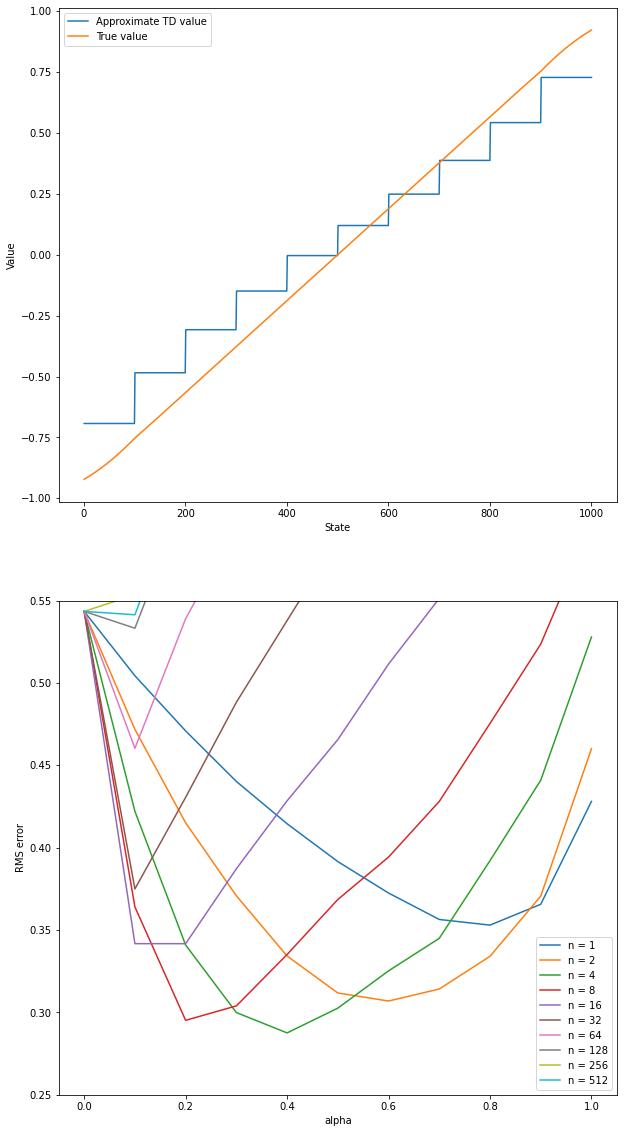

In [3]:
# semi-gradient TD on 1000-state random walk
def figure_9_2_left(true_value):
    episodes = int(1e5)
    alpha = 2e-4
    value_function = ValueFunction(10)
    for ep in tqdm(range(episodes)):
        semi_gradient_temporal_difference(value_function, 1, alpha)

    stateValues = [value_function.value(i) for i in STATES]
    plt.plot(STATES, stateValues, label='Approximate TD value')
    plt.plot(STATES, true_value[1: -1], label='True value')
    plt.xlabel('State')
    plt.ylabel('Value')
    plt.legend()

# different alphas and steps for semi-gradient TD
def figure_9_2_right(true_value):
    # all possible steps
    steps = np.power(2, np.arange(0, 10))

    # all possible alphas
    alphas = np.arange(0, 1.1, 0.1)

    # each run has 10 episodes
    episodes = 10

    # perform 100 independent runs
    runs = 100

    # track the errors for each (step, alpha) combination
    errors = np.zeros((len(steps), len(alphas)))
    for run in tqdm(range(runs)):
        for step_ind, step in zip(range(len(steps)), steps):
            for alpha_ind, alpha in zip(range(len(alphas)), alphas):
                # we have 20 aggregations in this example
                value_function = ValueFunction(20)
                for ep in range(0, episodes):
                    semi_gradient_temporal_difference(value_function, step, alpha)
                    # calculate the RMS error
                    state_value = np.asarray([value_function.value(i) for i in STATES])
                    errors[step_ind, alpha_ind] += np.sqrt(np.sum(np.power(state_value - true_value[1: -1], 2)) / N_STATES)
    # take average
    errors /= episodes * runs
    # truncate the error
    for i in range(len(steps)):
        plt.plot(alphas, errors[i, :], label='n = ' + str(steps[i]))
    plt.xlabel('alpha')
    plt.ylabel('RMS error')
    plt.ylim([0.25, 0.55])
    plt.legend()

plt.figure(figsize=(10, 20))
plt.subplot(2, 1, 1)
figure_9_2_left(true_value)
plt.subplot(2, 1, 2)
figure_9_2_right(true_value)
